<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JuanCarlos_GarciaRendonMartinez/blob/main/Data_Analysis_with_Python_(Mod_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Nombre**: Juan Carlos Garcia Rendon Martinez

**Matrícula**: A01793708

**Materia**: Ciencia y Analitica de Datos

**Profesor**: Bernardo Charles Canales

**Fecha**: 24/10/2022

# Model Evaluation and Refinement
En este modulo hablaremos sobre como estar seguros de que el modelo funciona en la vida real y funciona óptimamente

# Model Evaluation
Nos dice como funciona nuestro modelo, al separar la data en conjuntos de entrenamiento y prueba podemos simular el como evalua información con la que no se entrenó. Es común usar un 70-30.
Una función popular es train_test_split(). Al ingresar la data completa le indicamos el tamaño de los sets y nos devuelve 4 subconjuntos, las X y Y para entrenamiento y pruebas.

El error de generalización es una medida de que tan bien recibe nuestro modelo información que no ha visto antes. En general nos fijamos en la varianza y el sesgo para analizar que tan bien está actuando nuestro modelo. Una forma de evaluar muy efectiva es usar Validación Cruzada, la cual hace subonjuntos de nuestra información de prueba y entrena sobre un cierto número de subconjuntos dejando uno diferente para validar. Así al repetir este proceso se puede tener una media del rendimiento de los modelos

La funcion que se puede usar para evaluar cruzadamente es cross_val_score. La función va guardando la información de los resultados en arreys según el número de ejecuciones que le hayamos olicitado

# Overfitting, Underfitting and Model Selection
Cuando el modelo es muy simple para ajustarse a la información se llama subentrenamiento. Cuando el modelo se ajusta extremadamente a la información de entrenamiento pero falla en las predicciones se llama sobreentrenamiento. 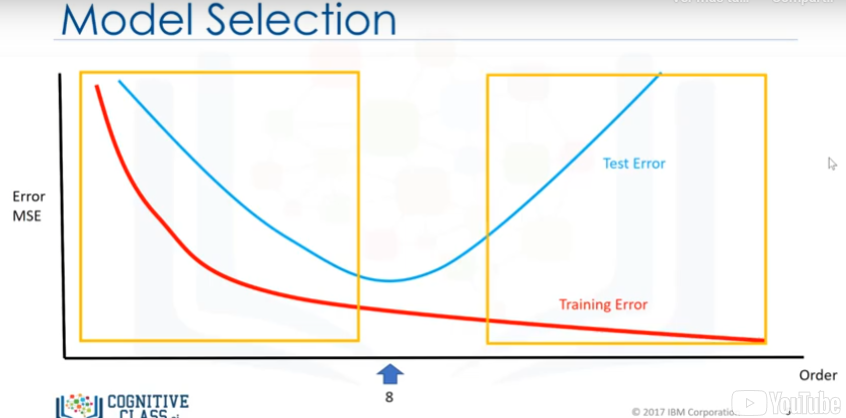

Lo de la izquierda es subentrenamiento y la derecha es sobreentrenamiento. Cabe destacar que siempre hay un poco de error que puede venir de muchos lados.




# Ridge Regression
En modelos de regresión, podemos usar el modelo de Ridge para evitar el overfitting, es un modelo de regularización. Se utiliza un parámetro alpha para contorlar los parámetros con los que se genera el modelo. Mientras alpha crece, los parámetros se reducen, si el alpha es muy largo mandará los coeficientes hasta cero y el modelo no servirá.

Para usar Ridge se puede usar la función Ridge de sklearn.linear_model. Para determinar el parámetro de alpha usamos la información de validación donde estaremos probando varios hiperparámetros y midiendo su rendimiento con R2 o el error medio.

# Grid Search
Esto nos servirá para poder seleccionar los mejores hiperparámetros, existe el método Grid_search. Toma varias opciones de hiperparámetros y aplica la validación cruzada, al evaluar los modelos se puede comparar cual tiene el mejor resultado según la metrica elegida. La función utiliza al tener diccionarios con los múltiples valores que pueda tomar cada hiperparámetro. Es importante considerar que con estos métodos podemos probar múltiples modelos, pero esto implica un costo en el tiempo de procesamiento. Es recomendable empezar de poco a mucho para optimizar el tiempo disponible



In [ ]:
# LAB 5
#Cargamos librerias
import pandas as pd
import numpy as np

#Descargamos el dataset y vemos contenido
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)
df.to_csv('module_5_auto.csv')
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [ ]:
#cargamos librerias requeridas por las funciones
from ipywidgets import interact, interactive, fixed, interact_manual

#Definimos funciones para g raficar la distribución y el grado polinomial
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [ ]:
#Cargamos librerias para hacer el split
from sklearn.model_selection import train_test_split

#Vamos a dividir la data en X,Y y conjuntos de entrtenamiento y prueba
y_data = df['price']
x_data=df.drop('price',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [ ]:
#Q1.Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [ ]:
#Cargamos librerias para generar el modelo
from sklearn.linear_model import LinearRegression

#Generamos el modelo
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)
print(lre.score(x_test[['horsepower']], y_test))
print(lre.score(x_train[['horsepower']], y_train))

0.36358755750788263
0.6619724197515104


In [ ]:
#Q2. Find the R^2 on the test data using 40% of the dataset for testing.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [ ]:
#Cargamos librerias para validación cruzada
from sklearn.model_selection import cross_val_score

#Definimos el objeto para la validación
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

#Calculamos su media y desviación estandar
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')


The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [ ]:
#Q3. Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [ ]:
#Tambien se puede usar la función siguiente para predecir el resultado
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [ ]:
#Vamos a crear múltiples objetos de regresión con varias variables
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

#Predecimos con data de entrenamiento
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print(yhat_train[0:5])

#Predecimos con data de prueba
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print(yhat_test[0:5])

[ 7426.6731551  28323.75090803 14213.38819709  4052.34146983
 34500.19124244]
[11349.35089149  5884.11059106 11208.6928275   6641.07786278
 15565.79920282]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


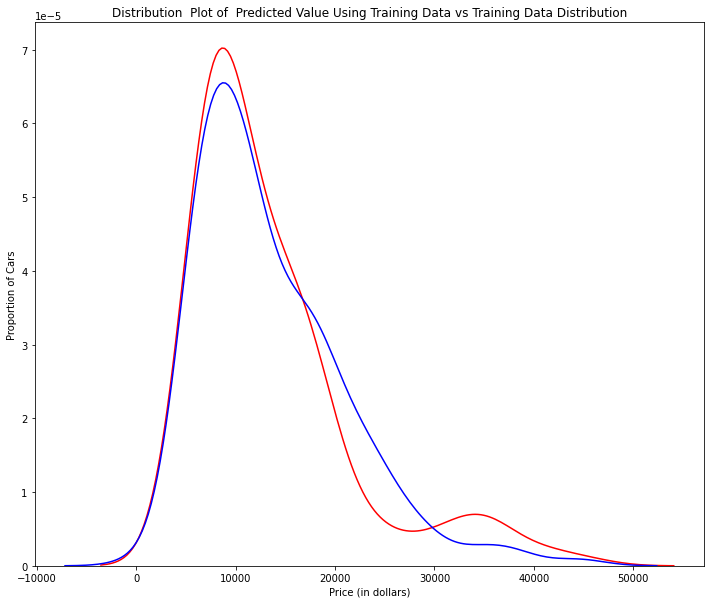

In [ ]:
#Vamos a evaluar ambos datos así que cargamos librerias para graficar
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Nombramos la data y graficamos
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


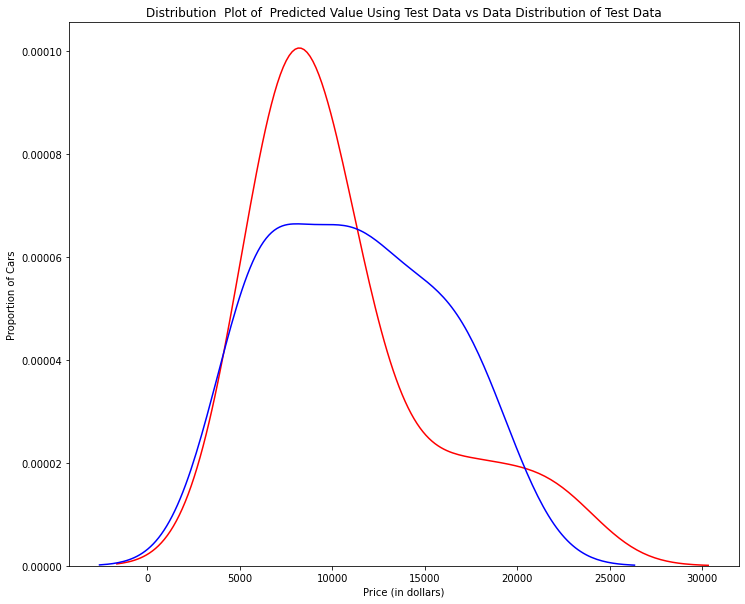

In [ ]:
#Generemos una nueva gráfica con data de pruebas
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
#Cargamos librerias para objetos polinomiales
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

yhat = poly.predict(x_test_pr)
yhat[0:5]

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


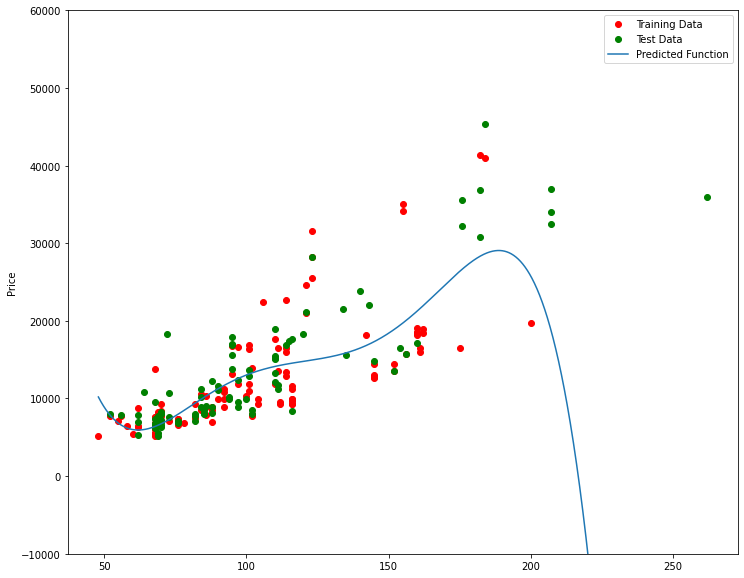

In [ ]:
#Graficamos la data pero vemos que se empieza a perder
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [ ]:
#Revisamos los scores y vemos como se vuelve negativa la R2, esto indica sobreentrenamiento
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test))

0.556771690212023
-29.87134030204415


Text(3, 0.75, 'Maximum R^2 ')

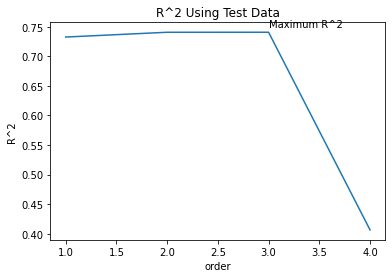

In [ ]:
#Ahora vamos a ver como cambia la data
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [ ]:
#Q4. We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1=PolynomialFeatures(degree=2)

In [ ]:
#Q4b. Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [ ]:
#Q4c. How many dimensions does the new feature have? Hint: use the attribute "shape".
x_train_pr1.shape

(110, 15)

In [ ]:
#Q4d. Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1=LinearRegression().fit(x_train_pr1,y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


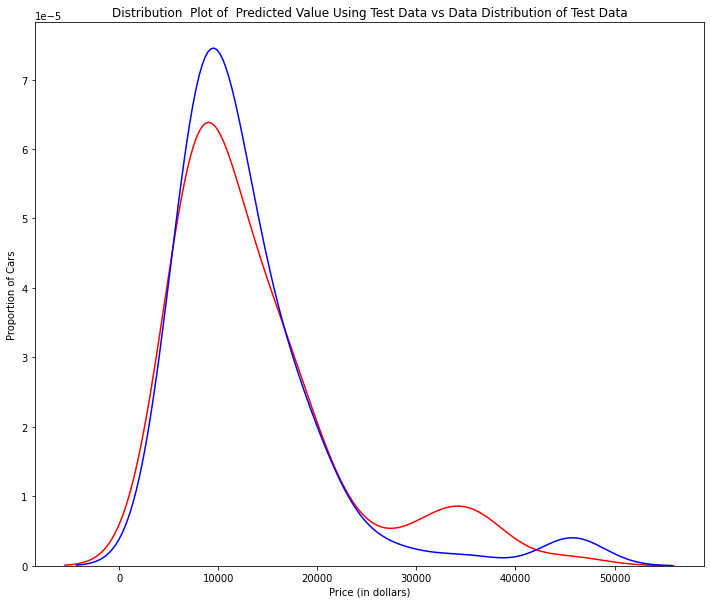

In [ ]:
#Q4e. Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [ ]:
#Q4f. Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.
#El valor predicho es mayor que el real cuando se tiene más de 10000 dolares, y en el rango de los 30000 enmpieza a diferir y no ser util


In [ ]:
#Ahora haremos algo de  regularización Ridge
from sklearn.linear_model import Ridge

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


100%|██████████| 1000/1000 [00:07<00:00, 138.40it/s, Test Score=0.564, Train Score=0.859]


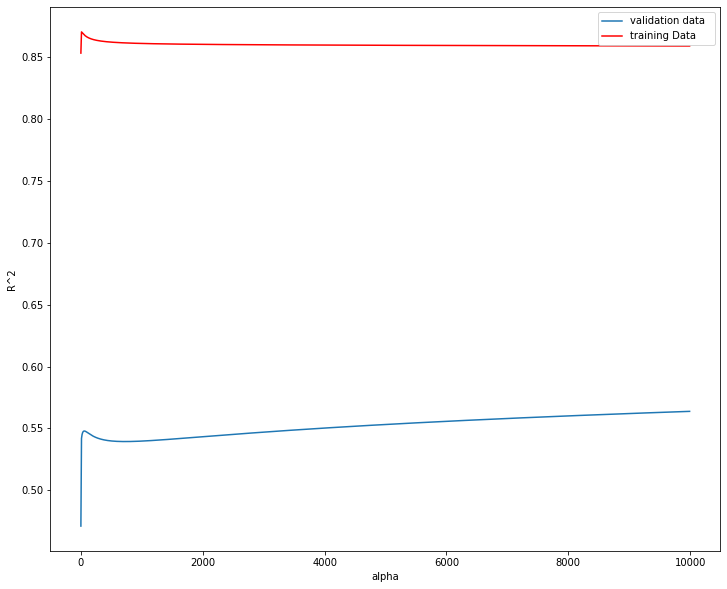

In [ ]:
#Graficamos
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [ ]:
#Q5. Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

In [ ]:
#Ahora haremos una búsqueda por malla
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

RR=Ridge()
RR

Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
BestRR=Grid1.best_estimator_
BestRR
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

# Graded Review Questions
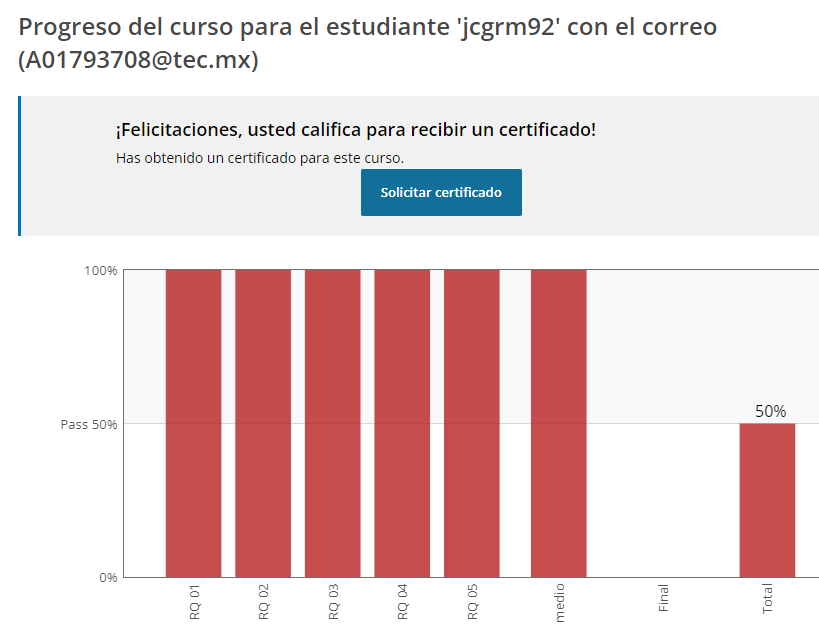